In [13]:
import dhlab as dh
import tools_imag as ti
from tools_imag import imag_corpus
import dhlab.api.dhlab_api as api
import pandas as pd
from importlib import reload

In [20]:
def get_imag_corpus():
    im = imag_corpus()
    c = dh.Corpus()
    c.extend_from_identifiers(im.urn)
    corpus = c.frame
    corpus.dhlabid = corpus.dhlabid.astype(int)
    corpus = corpus[['urn', 'dhlabid', 'title', 'authors', 
       'city',  'year', 'publisher', 'langs', 'subjects', 'ddc',
       'genres', 'literaryform', 'doctype', 'ocr_creator']]
    corpus = corpus.merge(im[['urn', 'category']], left_on='urn', right_on='urn')
    return corpus

In [17]:
_15.columns

Index(['urn', 'dhlabid', 'title', 'authors', 'oaiid', 'sesamid', 'isbn10',
       'city', 'timestamp', 'year', 'publisher', 'langs', 'subjects', 'ddc',
       'genres', 'literaryform', 'doctype', 'ocr_creator', 'ocr_timestamp'],
      dtype='object')

In [21]:
get_imag_corpus()

,urn,dhlabid,title,authors,city,year,publisher,langs,subjects,ddc,genres,literaryform,doctype,ocr_creator,category
0,URN:NBN:no-nb_digibok_2006082100007,100000474,Prædikener til Aarets Søndage og Helligdage,"Riddervold , Julius",Kristiania,1902.0,Lutherstiftelsen,nob,kirkeåret / prekener,,,Uklassifisert,digibok,nb,Religiøse / oppbyggelige tekster
1,URN:NBN:no-nb_digibok_2006111401054,100000547,Blandt Mexicos indianere : fem års reise i Sie...,"Lumholtz , Carl",Kristiania,1903.0,Aschehoug,nob,geografi/historie / etnografi / mexico / huich...,,,Uklassifisert,digibok,nb,Reiselitteratur
2,URN:NBN:no-nb_digibok_2006111600022,100000642,Julian den frafaldne : gudernes død : roman,"Merežkovskij , D. S.",Kristiania,1903.0,Norli,nob,,,,Uklassifisert,digibok,nb,Diktning: Epikk # Diktning: oversatt
3,URN:NBN:no-nb_digibok_2006111600027,100000647,Hjemmet : dets Arbeide og Indflydelse,"Gilman , Charlotte Perkins / Faye-Hansen , Kat...",Kristiania,1905.0,Aschehoug,nob / eng,hjemmet / barn / arbeid / familie,,,Uklassifisert,digibok,nb,Teknologi / håndverk / landbruk / havbruk
4,URN:NBN:no-nb_digibok_2006111600028,100000648,Prest og Formand : i den Forenede norsk-luther...,"Hoyme , G.",Minneapolis,1904.0,Augsburg Publ. House,nob,,,,Uklassifisert,digibok,nb,Religiøse / oppbyggelige tekster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22941,URN:NBN:no-nb_digibok_2019082926011,100664420,Geographisk Beskrivelse over Kongeriget Norge ...,"Falsen , Christian Magnus / Lehmann , Jacob / ...",,1821.0,Trykt hos Jacob Lehmann,dan,Geografi / 1800-tallet,,,Uklassifisert,digibok,dhlab,Historie / geografi
22942,URN:NBN:no-nb_digibok_2019120929001,100664421,Samlinger til det norske Folks Sprog og Histor...,"Roshauw , Carl L. / Roshauw , Carl L.",,1839.0,Samfundet for det norske Folks Sprogs Historie,dan,Historie / Språkhistorie / Språk / Historisk f...,,,Uklassifisert,digibok,dhlab,Historie / geografi
22943,URN:NBN:no-nb_digibok_2020113026014,100664422,Underholdende Tildragelser af Norges Historie,"Munch , P. A. / Cappelen , Jørgen Wright / Cap...",,1847.0,Trykt hos Louis Klein,dan,Historie,,,Uklassifisert,digibok,dhlab,Historie / geografi
22944,URN:NBN:no-nb_digibok_2019120929002,100664425,Samlinger til det norske Folks Sprog og Histor...,"Roshauw , Carl L. / Roshauw , Carl L.",,1837.0,Samfundet for det norske Folks Sprogs Historie,dan,Historie / Språkhistorie / Språk / Historisk f...,,,Uklassifisert,digibok,dhlab,Historie / geografi


In [2]:
c = ti.get_imag_corpus()

In [11]:
#pi.get_document_frequencies??

In [18]:
cnts = api.get_document_frequencies(list(c.urn), words = ["og", "i", '.', ','])

In [21]:
cnts

freq                                                              \
urn  100000474 100000547 100000642 100000647 100000648 100000649 100000652   
word                                                                         
,       8347.0    8909.0    6946.0    5854.0    7702.0    6600.0    2862.0   
.       5808.0    5654.0    5317.0    3419.0    5493.0    4583.0    1777.0   
i       2565.0    2657.0    1682.0    1506.0    2503.0    2884.0     673.0   
og      3999.0    3318.0    2242.0    2288.0    4640.0    3348.0    1445.0   

                                    ...   relfreq                      \
urn  100000658 100000660 100000663  ... 100664406 100664412 100664414   
word                                ...                                 
,       1754.0    1684.0    2589.0  ...  0.084105  0.081303  0.060131   
.        784.0    1004.0    2379.0  ...  0.035377  0.037558  0.042470   
i        445.0     477.0     834.0  ...  0.022428  0.022035  0.023859   
og       492.0     611.0    1787.0  ...  0.037558  0.033976  0.039139   

                                                                            
urn  100664415 100664418 100664420 100664421 100664422 100664425 100664430  
word                                                                        
,     0.063501  0.043493  0.099141  0.077967  0.079851  0.068601  0.066187  
.     0.036706  0.043493  0.078473  0.051505  0.036474  0.053575  0.057806  
i     0.019895  0.025254  0.020380  0.022533  0.016974  0.017270  0.022236  
og    0.039573  0.040439  0.029780  0.023452  0.035764  0.027890  0.027539  

[4 rows x 45104 columns]

In [3]:
def imagination_ngram(corpus, words, mode='rel'):
    cnts = api.get_document_frequencies(list(corpus.urn), words = words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    if mode.startswith('r') or mode.startswith('R'):
        df = cnts['relfreq']
    else:
        df = cnts['freq']
    frek = df.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').mean()

In [10]:
import dhlab.api.dhlab_api as api
import pandas as pd

def corpus_ngram(corpus, words, mode='rel'):
    cnts = api.get_document_frequencies(list(corpus.urn), words = words)
    d2y = pd.Series(corpus.set_index('dhlabid')['year'].to_dict())
    d2y.to_frame('year')
    if mode.startswith('r') or mode.startswith('R'):
        df = cnts['relfreq']
    else:
        df = cnts['freq']
    frek = df.transpose().copy()
    frek = pd.concat([frek, d2y.to_frame('year')], axis = 1)
    return frek.groupby('year').mean()

<Axes: xlabel='year'>

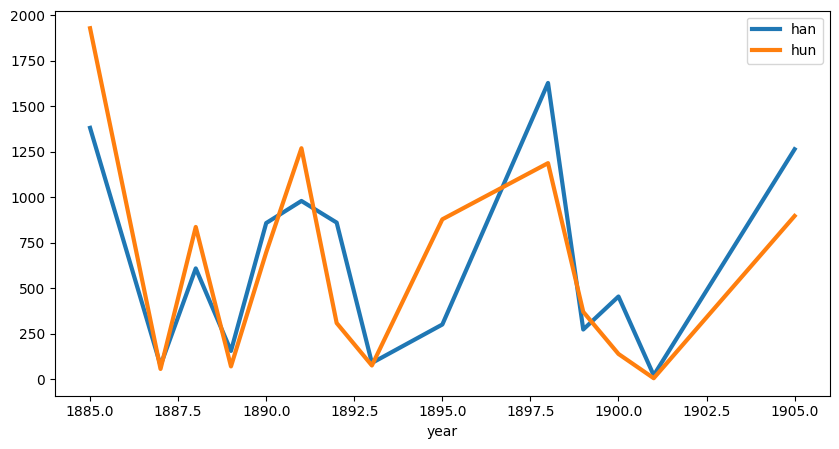

In [5]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["han", "hun"], mode="a").plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

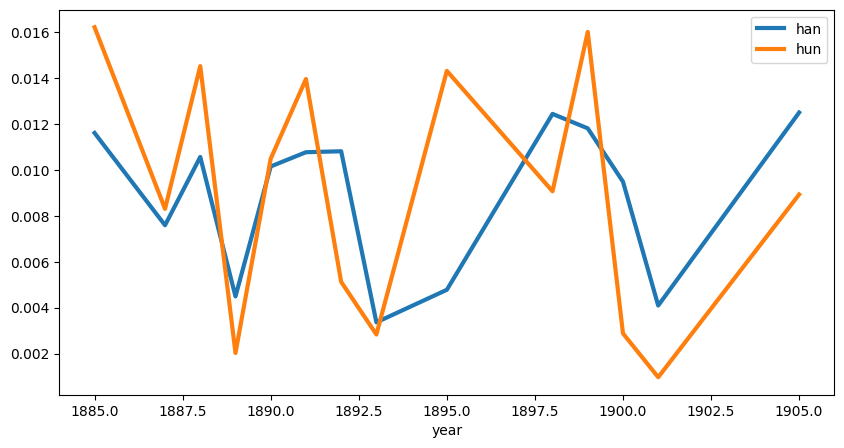

In [6]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["han", "hun"], mode="r").plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

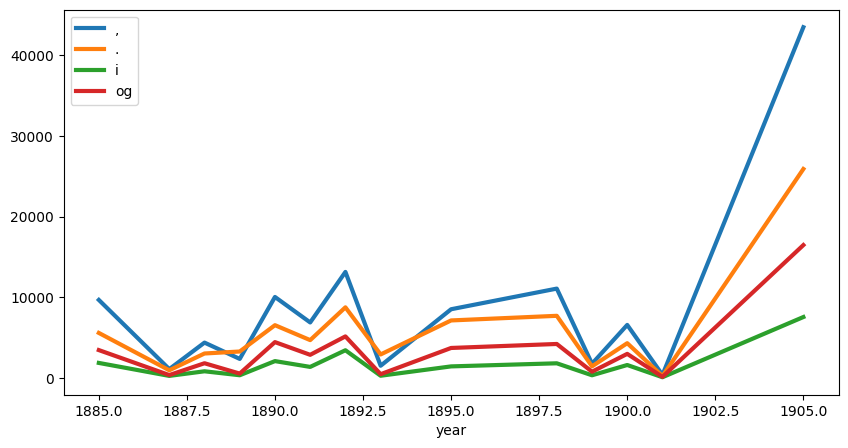

In [28]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["og", "i", '.', ','], mode='abs').plot(figsize=(10,5), lw=3)

<Axes: xlabel='year'>

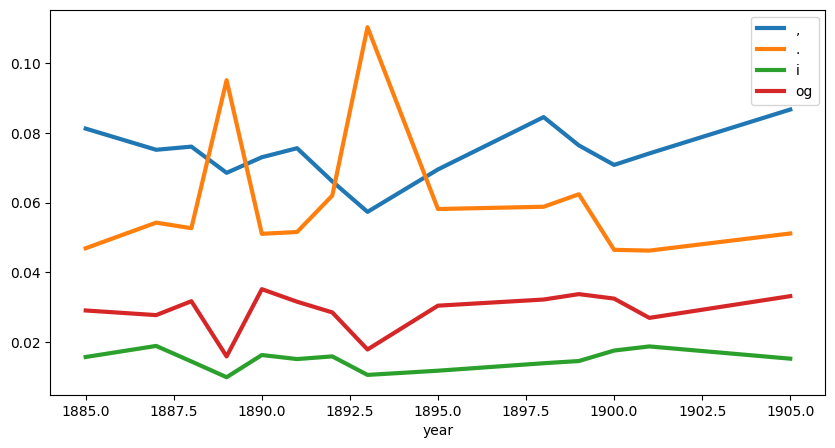

In [7]:
imagination_ngram(c[c.authors.str.contains("Amalie")], ["og", "i", '.', ','], mode='r').plot(figsize=(10,5), lw=3)